# Extra: Read Pickle

In [104]:
import joblib
import torch

dictionary = joblib.load('./checkpoints/Validation_Info.pkl')

max_specificity = torch.max(dictionary["Specificity"])
max_sensitivity = torch.max(dictionary["Sensitivity"])
max_accuracy = torch.max(dictionary["Accuracy"])

max_specificity_epoch = torch.argmax(dictionary["Specificity"])
max_sensitivity_epoch = torch.argmax(dictionary["Sensitivity"])
max_accuracy_epoch = torch.argmax(dictionary["Accuracy"])

print(f"Best Specificity ({max_specificity}) found at epoch {max_specificity_epoch}")
print(f"Best Sensitivity ({max_sensitivity}) found at epoch {max_sensitivity_epoch}")
print(f"Best Accuracy ({max_accuracy}) found at epoch {max_accuracy_epoch}")

Best Specificity (0.5982142686843872) found at epoch 0
Best Sensitivity (1.0) found at epoch 0
Best Accuracy (0.6484375) found at epoch 0


# INBreast Dataset

The dataset should be placed in the same folder as this notebook.

The directory should look like this:

    PMV-BIRADS
      |-INbreast Release 1.0
      |    |-AllDICOMs
      |    |    |...
      |    |-AllROI
      |    |    |...
      |    |-AllXML
      |    |    |...
      |    |-MedicalReports
      |    |    |...
      |    |-PectoralMuscle
      |    |    |-Pectoral Muscle ROI
      |    |    |    |...
      |    |    |-Pectoral Muscle XML
      |    |    |    |...
      |    |-inbreast.pdf
      |    |-INbreast.csv
      |    |-INbreast.xls
      |    |-README.txt
      |.ipynb_checkpoints (optional)
      |    |-Birads-checkpoint.ipynb
      |-Birads.ipynb

## Read Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = './INbreast Release 1.0'

dicom_path = os.path.join(data_path, 'AllDICOMs')
info_path = os.path.join(data_path, 'INbreast.csv')
report_path = os.path.join(data_path, 'MedicalReports')

image_path = os.path.join(data_path, 'Images')

if not os.path.isdir(image_path):
    os.mkdir(image_path)

In [3]:
dicom_dict = {'StudyID':[], 'DICOMID':[], 'FileID':[]}
for dicom in os.listdir(dicom_path):
    if dicom.endswith('.dcm'):
        file_id = dicom.split('_')[0]
        study_id = dicom.split('_')[1]
        dicom_dict['StudyID'].append(study_id)
        dicom_dict['DICOMID'].append(dicom)
        dicom_dict['FileID'].append(file_id)
        
df = pd.DataFrame.from_dict(dicom_dict, 
                            orient='columns')

print(f"Found {len(dicom_dict['StudyID'])} DICOM objects")

Found 410 DICOM objects


### BIRADS and Patient Info

In [4]:
info_df = pd.read_csv(info_path, sep=';')
info_df['FileID'] = info_df['File Name'].astype(str)
info_df = info_df.drop('Patient ID', axis=1)
info_df = info_df.drop('Patient age', axis=1)
info_df = info_df.merge(df, on='FileID')
info_df

,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,FileID,StudyID,DICOMID
0,R,CC,201001,22678622,4,1,22678622,61b13c59bcba149e,22678622_61b13c59bcba149e_MG_R_CC_ANON.dcm
1,L,CC,201001,22678646,4,3,22678646,61b13c59bcba149e,22678646_61b13c59bcba149e_MG_L_CC_ANON.dcm
2,R,MLO,201001,22678670,4,1,22678670,61b13c59bcba149e,22678670_61b13c59bcba149e_MG_R_ML_ANON.dcm
3,L,MLO,201001,22678694,4,3,22678694,61b13c59bcba149e,22678694_61b13c59bcba149e_MG_L_ML_ANON.dcm
4,R,CC,201001,22614074,2,5,22614074,6bd24a0a42c19ce1,22614074_6bd24a0a42c19ce1_MG_R_CC_ANON.dcm
...,...,...,...,...,...,...,...,...,...
405,L,MLO,201001,22613848,2,1,22613848,45c7f44839fd9e68,22613848_45c7f44839fd9e68_MG_L_ML_ANON.dcm
406,L,MLO,200802,24055725,4,2,24055725,f0f1a133837b5137,24055725_f0f1a133837b5137_MG_L_ML_ANON.dcm
407,R,MLO,200802,24055752,4,2,24055752,f0f1a133837b5137,24055752_f0f1a133837b5137_MG_R_ML_ANON.dcm
408,L,CC,200802,24055779,4,2,24055779,f0f1a133837b5137,24055779_f0f1a133837b5137_MG_L_CC_ANON.dcm


### BIRADS Distribution

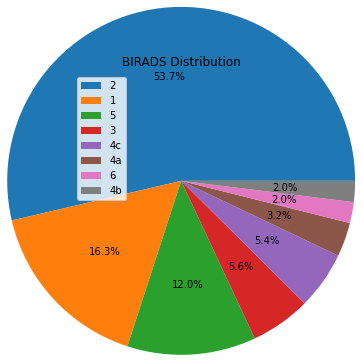

In [5]:
birads = info_df['Bi-Rads'].value_counts()
plt.pie(birads, autopct='%1.1f%%', radius=2)
plt.title("BIRADS Distribution")
plt.legend(labels=birads.index.values)
plt.show()

### Laterality Distribution

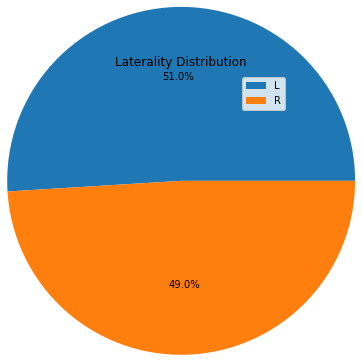

In [83]:
birads = info_df['Laterality'].value_counts()
plt.pie(birads, autopct='%1.1f%%', radius=2)
plt.title("Laterality Distribution")
plt.legend(labels=birads.index.values)
plt.show()

### View Distribution

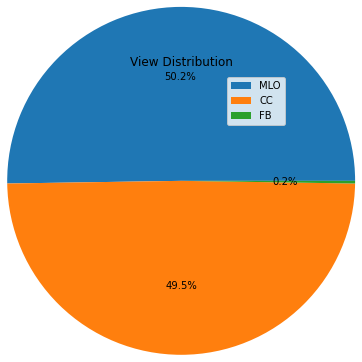

In [84]:
birads = info_df['View'].value_counts()
plt.pie(birads, autopct='%1.1f%%', radius=2)
plt.title("View Distribution")
plt.legend(labels=birads.index.values)
plt.show()

### Medical Reports

There are 117 reported images.

In [8]:
report_dict = {'StudyID':[], 'ReportID':[]}
for report in os.listdir(report_path):
    if report.endswith('.txt'):
        study_id = report[:-4]
        report_dict['StudyID'].append(study_id)
        report_dict['ReportID'].append(report)
        
report_df = pd.DataFrame.from_dict(report_dict, 
                            orient='columns')

report_df = report_df.merge(df, on='StudyID')

print(f"Found {len(report_dict['StudyID'])} Medical Reports")

Found 117 Medical Reports


# Prepare Data

In [9]:
import numpy as np
import pydicom as dm
from PIL import Image
from skimage.transform import resize

for dicom in df['DICOMID']:
    path = os.path.join(dicom_path, dicom)
    img = dm.dcmread(path)
    img = img.pixel_array
    img = np.array(img)
    img = img / np.max(img)
    img = img * 255
    img = img.astype(np.uint8)
    img = resize(img, (512, 512))
    plt.imsave(os.path.join(image_path, dicom + '.png'), img, cmap='Greys_r')

# Model Creation

In [10]:
import torchvision
import torch.nn as nn

from torchvision.models import resnet18, resnet34, resnet50, resnet101, resnet152

Se considera un modelo de un encoder y dos cabezales. 

El encoder utilizado corresponde a un modelo ResNet-50, pues ha demostrado buen rendimiento en _image representation_.

El primer cabezal consiste en una capa de tipo fully-connected, la cual mapea el vector de representaciones obtenido en el encoder, al espacio de salida de clasificación BIRADS (vector de tamaño 8 para BIRADS 0, 1, 2, 3A, 3B, 3C, 4 y 5).

El segundo cabezal consiste en un decoder tipo BERT. Este modelo busca la conversión del vector de representaciones entregado por el encoder, a texto, específicamente para la generación de un pseudo informe.

Se toma esta estructura debido al tamaño de los decoders y la data disponible. El decoder de clasificación es extremadamente ligero y presenta poca o nula pérdida de gradiente por gradiente desvaneciente. Además, hay mucha más data de clasificación que de reportes médicos. 

De esta manera, se sugiere el siguiente método de entrenamiento:

    1- Entrenamiento cabezal de clasificación y encoder:
        Este paso consiste en entrenar el modelo solamente para el problema de clasifiación. Esto permite entrenar el encoder con más data y con menor pérdida de gradiente.
        
    2- Fine-Tuning con cabezal de texto. En este paso se considera congelar todos los pesos del encoder. De esta manera, solo se entrena el cabezal de texto.
    
Esta metodología permite aprovechar de mejor manera los datos, sin gran sacrificio en términos de rendimiento.

In [81]:
# BIRADS: 0, 1, 2, 3A, 3B, 3C, 4 y 5
class BIRADS_MODEL(nn.Module): 
    
    def __init__(self, n_channels = 1, n_classes = 8, backbone = 'resnet18'):
        
        super(BIRADS_MODEL, self).__init__()
        
        if backbone == 'resnet18':
            self.backbone = resnet18()
            backbone_size = 512
            
        elif backbone == 'resnet34':
            self.backbone = resnet34()
            backbone_size = 512
            
        elif backbone == 'resnet50':
            self.backbone = resnet50()
            backbone_size = 2048
            
        elif backbone == 'resnet101':
            self.backbone = resnet101()
            backbone_size = 2048
            
        elif backbone == 'resnet152':
            self.backbone = resnet152()
            backbone_size = 2048
            
        self.backbone.fc = nn.Identity()
        self.backbone.conv1 = torch.nn.Conv2d(1, 64, (7, 7), (2, 2), (3, 3), bias=False)
        
        self.class_head = nn.Linear(backbone_size, n_classes)
        
        self.sigmoid = nn.Sigmoid()
        
        self.report_cvt = nn.Linear(backbone_size, 512)
        self.report_head = AutoModelForCausalLM.from_pretrained("bert-base-multilingual-cased", is_decoder=True)
        
    def forward(self, x, classify = True, generate_report = True):
        
        x = self.backbone(x)
        
        cls = self.class_head(x) if classify else None
        
        x = self.report_cvt(x)
        x = self.sigmoid(x) #Convert encoder output to int
        x = x.int()
        report = self.report_head(x) if generate_report else None
        
        return {"BIRADS": cls,
                  "Report": report}

In [12]:
import torch
from torch.utils.data import Dataset

class DefaultDataset(Dataset):
    def __init__(self, df, img_size, img_dir):
        super(DefaultDataset, self).__init__()
        
        self.df = df[['DICOMID', 'Bi-Rads']]
        self.df['DICOMID'] = self.df['DICOMID'].apply(lambda x: img_dir + "/" + x + ".png")
        self.img_size = (img_size, img_size) if img_size is not None else None
        
        self.label_dict = {"1": 1,
                           "2": 2,
                           "3": 3,
                           "4a": 4,
                           "4b": 5,
                           "4c":6,
                           "5": 7,
                           "6": 8}
        
        print(f"Created Dataset with {len(df)} examples")
    
    def preprocess(self, pil_img):
        # Resize
        if self.img_size:
            pil_img = pil_img.resize(self.img_size, resample=Image.NEAREST)

        pil_img = pil_img.convert('L')

        # To ndarray
        img_ndarray = np.asarray(pil_img, dtype=np.uint32)

        img_ndarray = (img_ndarray * 255) // np.max(img_ndarray)

        img_ndarray = img_ndarray.astype(np.uint8)
        
        if img_ndarray.ndim == 2:
            img_ndarray = np.expand_dims(img_ndarray, 0)

        return img_ndarray
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df['DICOMID'][idx]
        img = Image.open(img_path)
        img = self.preprocess(img)
        img = torch.as_tensor(img.copy()).float().contiguous()
        
        label = self.df['Bi-Rads'][idx]
        one_hot = np.zeros(8)
        one_hot[self.label_dict[label]] = 1
        one_hot = torch.as_tensor(one_hot.copy())
        
        return {'images': img, 'labels': one_hot}

In [58]:
import torch
import codecs
from torch.utils.data import Dataset
from transformers import AutoTokenizer

class ReportDataset(Dataset):
    def __init__(self, df, img_size, img_dir, report_dir):
        super(ReportDataset, self).__init__()
        
        self.df = df[['DICOMID', 'ReportID']]
        self.df['ReportID'] = self.df['ReportID'].apply(lambda x: report_dir + "/" + x)
        self.df['DICOMID'] = self.df['DICOMID'].apply(lambda x: img_dir + "/" + x + ".png")
        self.img_size = (img_size, img_size) if img_size is not None else None
        
        print(f"Created Dataset with {len(df)} examples")
    
    def preprocess(self, pil_img):
        # Resize
        if self.img_size:
            pil_img = pil_img.resize(self.img_size, resample=Image.NEAREST)

        pil_img = pil_img.convert('L')

        # To ndarray
        img_ndarray = np.asarray(pil_img, dtype=np.uint32)

        img_ndarray = (img_ndarray * 255) // np.max(img_ndarray)

        img_ndarray = img_ndarray.astype(np.uint8)
        
        if img_ndarray.ndim == 2:
            img_ndarray = np.expand_dims(img_ndarray, 0)

        return img_ndarray
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df['DICOMID'][idx]
        img = Image.open(img_path)
        img = self.preprocess(img)
        img = torch.as_tensor(img.copy()).float().contiguous()
        
        label_path = self.df['ReportID'][idx]
        
        with codecs.open(label_path, encoding='latin-1') as report:
            
            report = report.read()
        
            tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
            
            label = tokenizer(report, return_tensors='pt', padding='max_length', truncation=True)    
            
            return {'labels': label['input_ids'].flatten(),
                    'images': img}
        
        raise Exception("FileNotFoundError")

# Classification Training 

In [13]:
!pip install sentencepiece sacremoses

In [14]:
import logging
import sys
from pathlib import Path

import torch
import pickle
import torch.nn as nn
import torch.nn.functional as F
import wandb
from torch import optim
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split

import os
import time
import numpy as np
import matplotlib.pyplot as plt

import torchvision.models as models

import sentencepiece
import sacremoses

from transformers import TrainingArguments, Trainer
from transformers import AutoModelForCausalLM

2023-10-31 13:45:53.138130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 13:45:53.987397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
def evaluate(net, dataloader, device):
    net.eval()
    num_val_batches = len(dataloader)

    score = 0

        # iterate over the validation set
    for batch in tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False):

        image, mask_true = batch['images'], batch['labels']
        # move images and labels to correct device and type
        image = image.to(device=device, dtype=torch.float32)

        with torch.no_grad():
            # predict the mask
            mask_pred = net(image, generate_report = False)['BIRADS']

            thresh = torch.Tensor([0.5]).to(device=device, dtype=torch.float32)

            one_hot = (mask_pred > thresh).bool()

            true_one_hot = mask_true.to(device=device, dtype=torch.bool)

            TP = torch.sum(true_one_hot * one_hot)
            TN = torch.sum(~true_one_hot * ~one_hot)
            FP = torch.sum(~true_one_hot * one_hot)
            FN = torch.sum(true_one_hot * ~one_hot)

            P = TP/(FP+TP+1e-8)
            R = TP/(FN+TP+1e-8)

            score += 2*P*R/(P+R+1e-8)

            out = {'Accuracy': (TP+TN)/(TP+TN+FP+FN+1e-8),
                'Sensitivity': TP/(TP+FN+1e-8),
                'Specificity': TN/(TN+FP+1e-8)}

    net.train()

    # Fixes a potential division by zero error
    if num_val_batches == 0:
        return score, out
    return score / num_val_batches, out

In [30]:
def train_classification(data,
                         data_path = image_path,
                         model = BIRADS_MODEL,
                         datagen = DefaultDataset,
                         n_channels = 1,
                         n_classes = 8,
                         epochs = 40,
                         lr = 0.001,
                         validation = 30,
                         batch_size = 4,
                         size = 512,
                         model_name = 'BIRADS_MODEL',
                         save_checkpoint = "./checkpoints/"):
    
    net = model(n_channels = n_channels,
                n_classes = n_classes)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Log info
    logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
    logging.info(f'Using device {device}')

    # 1. Dataset Creation and Network Building
    dataset = DefaultDataset(data, img_size=size, img_dir=data_path)

    net.to(device=device)
    
    if device == 'cuda':
        torch.cuda.empty_cache()

    # 2. Dataset Splitting and Data Loading
    n_val = int(len(dataset) * validation/100)
    n_train = len(dataset) - n_val
    train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(0))

    loader_args = dict(batch_size=batch_size, num_workers=4, pin_memory=True)
    train_loader = DataLoader(train_set, shuffle=True, **loader_args)
    val_loader = DataLoader(val_set, shuffle=False, drop_last=True, **loader_args)

    # 3. Initialize Training Modules
    optimizer = optim.Adam(net.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2, factor=0.5)
    criterion = nn.CrossEntropyLoss()
    grad_scaler = torch.cuda.amp.GradScaler(enabled=False)

    experiment = wandb.init(project=model_name, resume='allow', anonymous='must')
    experiment.config.update(dict(epochs=epochs, batch_size=batch_size, learning_rate=lr,
                          val_percent=validation, save_checkpoint=save_checkpoint, img_size=size,
                          amp=False, lr_scheduler=scheduler, optimizer='Adam', model=model_name))


    logging.info(f'''Starting training:
        Model:                  {model_name}
        Epochs:                 {epochs}
        Batch size:             {batch_size}
        Learning rate:          {1e-3}
        Training size:          {n_train}
        Validation size:        {n_val}
        Checkpoints:            {save_checkpoint}
        Device:                 {device.type}
        Images resizing:        {size}
    ''')

    # 5. Train model
    global_step = 0
    train_score = []
    validation_score = []
    batch_validation_score = []
    learnig_rate_val = []

    accuracy = []
    sensitivity = []
    specificity = []

    for epoch in range(1, epochs+1):

        # Initialize Net and Epoch 
        net.train()
        epoch_loss = 0

        # 
        with tqdm(total=n_train, desc=f'Epoch {epoch}/{epochs}', unit='img') as pbar:
            for batch in train_loader:
                images = batch['images']
                labels = batch['labels']

                assert images.shape[1] == n_channels, \
                    f'Network has been defined with {n_channels} input channels, ' \
                    f'but loaded images have {images.shape[1]} channels. Please check that ' \
                    'the images are loaded correctly.'

                images = images.to(device=device, dtype=torch.float32)
                ####################################################################################
                true_masks = labels.to(device=device, dtype=torch.long)

                with torch.cuda.amp.autocast(enabled=False):
                    masks_pred = net(images, generate_report = False)["BIRADS"] ######## REPORT ########
                    loss = criterion(masks_pred, true_masks.float())

                optimizer.zero_grad(set_to_none=True)
                grad_scaler.scale(loss).backward()
                grad_scaler.step(optimizer)
                grad_scaler.update()

                pbar.update(images.shape[0])
                global_step += 1
                epoch_loss += loss.item()
                experiment.log({
                    'train loss': loss.item(),
                    'step': global_step,
                    'epoch': epoch
                })
                pbar.set_postfix(**{'loss (batch)': loss.item()})

                # Evaluation round
                division_step = (n_train // (10 * batch_size))
                if division_step > 0:
                    if global_step % division_step == 0:
                        val_score, _ = evaluate(net, val_loader, device)
                        batch_validation_score.append(val_score.cpu())

                        logging.info('Validation F1 Score: {}'.format(val_score))
                        experiment.log({
                            'learning rate': optimizer.param_groups[0]['lr'],
                            'validation Score': val_score,
                            'images': wandb.Image(images[0].cpu()),
                            'step': global_step,
                            'epoch': epoch
                        })
            val_score, val_info = evaluate(net, val_loader, device)
            scheduler.step(val_score)
            validation_score.append(val_score.cpu())
            trn_score, trn_info = evaluate(net, train_loader, device)
            train_score.append(trn_score.cpu())
            learnig_rate_val.append(optimizer.param_groups[0]['lr'])

            accuracy.append(val_info['Accuracy'].cpu())
            sensitivity.append(val_info['Sensitivity'].cpu())
            specificity.append(val_info['Specificity'].cpu())

        if save_checkpoint:
            Path(save_checkpoint).mkdir(parents=True, exist_ok=True)
            torch.save(net.state_dict(), str(save_checkpoint + 'checkpoint_epoch{}.pth'.format(epoch)))
            logging.info(f'Checkpoint {epoch} saved!')
            with open(str(save_checkpoint)+f"Train_Info.pkl", 'wb') as fp:
                pickle.dump(trn_info, fp)
                print('Train Info saved successfully to file')
            with open(str(save_checkpoint)+f"Validation_Info.pkl", 'wb') as fp:
                val_info = {"Accuracy": accuracy,
                           "Sensitivity": sensitivity,
                           "Specificity": specificity}
                pickle.dump(val_info, fp)
                print('Validation Info saved successfully to file')
            plt.plot(accuracy)
            plt.savefig(str(save_checkpoint) + "Accuracy.png")
            plt.plot(sensitivity)
            plt.savefig(str(save_checkpoint) + "Sensitivity.png")
            plt.plot(specificity)
            plt.savefig(str(save_checkpoint) + "Specificity.png")


WARNING: RUNNING THIS NEXT CELL WILL DELETE EVERYTHING IN CHEKPOINTS FOLDER

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO: Using device cuda


Created Dataset with 410 examples


/tmp/ipykernel_244206/1769844400.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['DICOMID'] = self.df['DICOMID'].apply(lambda x: img_dir + "/" + x + ".png")


epoch,▁▁▁▁▁▁▁▁▁
step,▁▂▃▄▅▅▆▇█
train loss,█▅▄▂▁▂▂▄▁
epoch,1
step,9
train loss,1.32001


2023-10-30 18:48:32.212195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Starting training:
        Model:                  BIRADS_MODEL
        Epochs:                 40
        Batch size:             32
        Learning rate:          0.001
        Training size:          287
        Validation size:        123
        Checkpoints:            ./checkpoints/
        Device:                 cuda
        Images resizing:        512
    
Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.39batch/s]
                                                                                
Epoch 1/40: 100%|█████████| 287/287 [00:03<00:00, 90.06img/s, loss (batch)=1.51]
INFO: Checkpoint 1 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.31batch/s]
                                                                                
Epoch 2/40: 100%|█████████| 287/287 [00:03<00:00, 89.57img/s, loss (batch)=1.21]
INFO: Checkpoint 2 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.30batch/s]
                                                                                
Epoch 3/40: 100%|█████████| 287/287 [00:03<00:00, 90.95img/s, loss (batch)=1.17]
INFO: Checkpoint 3 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.33batch/s]
                                                                                
Epoch 4/40: 100%|█████████| 287/287 [00:03<00:00, 90.94img/s, loss (batch)=1.68]
INFO: Checkpoint 4 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.33batch/s]
                                                                                
Epoch 5/40: 100%|█████████| 287/287 [00:03<00:00, 90.16img/s, loss (batch)=1.07]
INFO: Checkpoint 5 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.25batch/s]
                                                                                
Epoch 6/40: 100%|█████████| 287/287 [00:03<00:00, 89.03img/s, loss (batch)=1.19]
INFO: Checkpoint 6 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.17batch/s]
                                                                                
Epoch 7/40: 100%|█████████| 287/287 [00:03<00:00, 88.08img/s, loss (batch)=1.29]
INFO: Checkpoint 7 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.29batch/s]
                                                                                
Epoch 8/40: 100%|█████████| 287/287 [00:03<00:00, 90.72img/s, loss (batch)=1.26]
INFO: Checkpoint 8 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 9/40: 100%|█████████| 287/287 [00:03<00:00, 89.35img/s, loss (batch)=1.37]
INFO: Checkpoint 9 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.37batch/s]
                                                                                
Epoch 10/40: 100%|████████| 287/287 [00:03<00:00, 88.41img/s, loss (batch)=1.17]
INFO: Checkpoint 10 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.35batch/s]
                                                                                
Epoch 11/40: 100%|████████| 287/287 [00:03<00:00, 88.47img/s, loss (batch)=1.15]
INFO: Checkpoint 11 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.16batch/s]
                                                                                
Epoch 12/40: 100%|████████| 287/287 [00:03<00:00, 87.17img/s, loss (batch)=0.91]
INFO: Checkpoint 12 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.27batch/s]
                                                                                
Epoch 13/40: 100%|████████| 287/287 [00:03<00:00, 88.89img/s, loss (batch)=1.08]
INFO: Checkpoint 13 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 14/40: 100%|████████| 287/287 [00:03<00:00, 88.11img/s, loss (batch)=1.07]
INFO: Checkpoint 14 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:01,  1.96batch/s]
                                                                                
Epoch 15/40: 100%|████████| 287/287 [00:03<00:00, 88.23img/s, loss (batch)=1.14]
INFO: Checkpoint 15 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 16/40: 100%|████████| 287/287 [00:03<00:00, 89.72img/s, loss (batch)=1.26]
INFO: Checkpoint 16 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 17/40: 100%|████████| 287/287 [00:03<00:00, 89.55img/s, loss (batch)=1.17]
INFO: Checkpoint 17 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.29batch/s]
                                                                                
Epoch 18/40: 100%|███████| 287/287 [00:03<00:00, 88.58img/s, loss (batch)=0.953]
INFO: Checkpoint 18 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.24batch/s]
                                                                                
Epoch 19/40: 100%|███████| 287/287 [00:03<00:00, 88.79img/s, loss (batch)=0.829]
INFO: Checkpoint 19 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.21batch/s]
                                                                                
Epoch 20/40: 100%|███████| 287/287 [00:03<00:00, 88.65img/s, loss (batch)=0.959]
INFO: Checkpoint 20 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.32batch/s]
                                                                                
Epoch 21/40: 100%|████████| 287/287 [00:03<00:00, 88.95img/s, loss (batch)=1.41]
INFO: Checkpoint 21 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 22/40: 100%|███████| 287/287 [00:03<00:00, 88.75img/s, loss (batch)=0.953]
INFO: Checkpoint 22 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.22batch/s]
                                                                                
Epoch 23/40: 100%|████████| 287/287 [00:03<00:00, 88.63img/s, loss (batch)=1.15]
INFO: Checkpoint 23 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.36batch/s]
                                                                                
Epoch 24/40: 100%|███████| 287/287 [00:03<00:00, 91.38img/s, loss (batch)=0.858]
INFO: Checkpoint 24 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 25/40: 100%|███████| 287/287 [00:03<00:00, 89.11img/s, loss (batch)=0.831]
INFO: Checkpoint 25 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.32batch/s]
                                                                                
Epoch 26/40: 100%|███████| 287/287 [00:03<00:00, 88.96img/s, loss (batch)=0.789]
INFO: Checkpoint 26 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:01,  1.76batch/s]
                                                                                
Epoch 27/40: 100%|███████| 287/287 [00:03<00:00, 86.16img/s, loss (batch)=0.585]
INFO: Checkpoint 27 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:01,  1.79batch/s]
                                                                                
Epoch 28/40: 100%|███████| 287/287 [00:03<00:00, 85.83img/s, loss (batch)=0.665]
INFO: Checkpoint 28 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.34batch/s]
                                                                                
Epoch 29/40: 100%|███████| 287/287 [00:03<00:00, 90.39img/s, loss (batch)=0.673]
INFO: Checkpoint 29 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 30/40: 100%|███████| 287/287 [00:03<00:00, 89.08img/s, loss (batch)=0.692]
INFO: Checkpoint 30 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:01,  1.96batch/s]
                                                                                
Epoch 31/40: 100%|███████| 287/287 [00:03<00:00, 88.01img/s, loss (batch)=0.544]
INFO: Checkpoint 31 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.33batch/s]
                                                                                
Epoch 32/40: 100%|███████| 287/287 [00:03<00:00, 89.13img/s, loss (batch)=0.723]
INFO: Checkpoint 32 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 33/40: 100%|███████| 287/287 [00:03<00:00, 89.14img/s, loss (batch)=0.855]
INFO: Checkpoint 33 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:01,  1.77batch/s]
                                                                                
Epoch 34/40: 100%|███████| 287/287 [00:03<00:00, 85.15img/s, loss (batch)=0.656]
INFO: Checkpoint 34 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.20batch/s]
                                                                                
Epoch 35/40: 100%|█████████| 287/287 [00:03<00:00, 82.06img/s, loss (batch)=0.5]
INFO: Checkpoint 35 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.13batch/s]
                                                                                
Epoch 36/40: 100%|███████| 287/287 [00:03<00:00, 84.20img/s, loss (batch)=0.391]
INFO: Checkpoint 36 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.27batch/s]
                                                                                
Epoch 37/40: 100%|███████| 287/287 [00:03<00:00, 87.32img/s, loss (batch)=0.578]
INFO: Checkpoint 37 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.27batch/s]
                                                                                
Epoch 38/40: 100%|███████| 287/287 [00:03<00:00, 89.08img/s, loss (batch)=0.464]
INFO: Checkpoint 38 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 39/40: 100%|███████| 287/287 [00:03<00:00, 87.97img/s, loss (batch)=0.654]
INFO: Checkpoint 39 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


Validation round:  33%|████████                | 1/3 [00:00<00:00,  2.26batch/s]
                                                                                
Epoch 40/40: 100%|███████| 287/287 [00:03<00:00, 88.61img/s, loss (batch)=0.445]
INFO: Checkpoint 40 saved!


Train Info saved successfully to file
Validation Info saved successfully to file


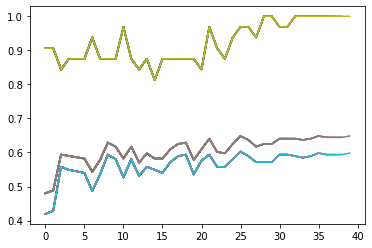

In [31]:
train_classification(info_df,
                     model = BIRADS_MODEL,
                     datagen = DefaultDataset,
                     n_channels = 1,
                     n_classes = 8,
                     epochs = 40,
                     lr = 0.001,
                     validation = 30,
                     batch_size = 32,
                     size = 512)

# Report Fine-Tuning
THIS CODE DOES NOT HAVE VALIDATION STEP

In [41]:
def train_language_modelling(dataset,
                         model,
                         n_channels = 1,
                         n_classes = 8,
                         epochs = 40,
                         lr = 0.001,
                         validation = 30,
                         batch_size = 4,
                         size = 512,
                         model_name = 'BIRADS_MODEL',
                         save_checkpoint = "./checkpoints/"):
    
    net = model

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Log info
    logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
    logging.info(f'Using device {device}')

    net.to(device=device)
    
    if device == 'cuda':
        torch.cuda.empty_cache()

    # 2. Dataset Splitting and Data Loading
    n_val = int(len(dataset) * validation/100)
    n_train = len(dataset) - n_val
    train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(0))

    loader_args = dict(batch_size=batch_size, num_workers=4, pin_memory=True)
    train_loader = DataLoader(train_set, shuffle=True, **loader_args)
    val_loader = DataLoader(val_set, shuffle=False, drop_last=True, **loader_args)

    # 3. Initialize Training Modules
    optimizer = optim.Adam(net.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=2, factor=0.5)
    criterion = nn.CrossEntropyLoss()
    grad_scaler = torch.cuda.amp.GradScaler(enabled=False)

    experiment = wandb.init(project=model_name, resume='allow', anonymous='must')
    experiment.config.update(dict(epochs=epochs, batch_size=batch_size, learning_rate=lr,
                          val_percent=validation, save_checkpoint=save_checkpoint, img_size=size,
                          amp=False, lr_scheduler=scheduler, optimizer='Adam', model=model_name))


    logging.info(f'''Starting training:
        Model:                  {model_name}
        Epochs:                 {epochs}
        Batch size:             {batch_size}
        Learning rate:          {1e-3}
        Training size:          {n_train}
        Validation size:        {n_val}
        Checkpoints:            {save_checkpoint}
        Device:                 {device.type}
        Images resizing:        {size}
    ''')

    # 5. Train model
    global_step = 0
    train_score = []
    validation_score = []
    batch_validation_score = []
    learnig_rate_val = []

    accuracy = []
    sensitivity = []
    specificity = []

    for epoch in range(1, epochs+1):

        # Initialize Net and Epoch 
        net.train()
        epoch_loss = 0

        # 
        with tqdm(total=n_train, desc=f'Epoch {epoch}/{epochs}', unit='img') as pbar:
            for batch in train_loader:
                images = batch['images']
                labels = batch['labels']

                assert images.shape[1] == n_channels, \
                    f'Network has been defined with {n_channels} input channels, ' \
                    f'but loaded images have {images.shape[1]} channels. Please check that ' \
                    'the images are loaded correctly.'

                images = images.to(device=device, dtype=torch.float32)
                ####################################################################################
                true_masks = labels.to(device=device, dtype=torch.long)

                with torch.cuda.amp.autocast(enabled=False):
                    masks_pred = net(images, generate_report = True)["Report"]
                    masks_pred = torch.argmax(masks_pred.logits, dim=2)
                    loss = criterion(masks_pred.float(), true_masks.float())

                optimizer.zero_grad(set_to_none=True)
                loss.requires_grad = True
                grad_scaler.scale(loss).backward()
                grad_scaler.step(optimizer)
                grad_scaler.update()

                pbar.update(images.shape[0])
                global_step += 1
                epoch_loss += loss.item()
                experiment.log({
                    'train loss': loss.item(),
                    'step': global_step,
                    'epoch': epoch
                })
                pbar.set_postfix(**{'loss (batch)': loss.item()})

        if save_checkpoint:
            Path(save_checkpoint).mkdir(parents=True, exist_ok=True)
            torch.save(net.state_dict(), str(save_checkpoint + 'checkpoint_epoch{}.pth'.format(epoch)))
            logging.info(f'Checkpoint {epoch} saved!')


## Parameters and Values

In [17]:
#Select here the best training model
load = "./checkpoints/checkpoint_epoch40.pth"

In [18]:
model = BIRADS_MODEL()

model.load_state_dict(torch.load(load))

model.backbone.fc.requires_grad = False
model.backbone.conv1.requires_grad = False
model.class_head.requires_grad = False

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
dataset = ReportDataset(report_df, img_size=512, img_dir=image_path, report_dir=report_path)

train_language_modelling(dataset, model)

/tmp/ipykernel_10261/49275663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['ReportID'] = self.df['ReportID'].apply(lambda x: report_dir + "/" + x)
/tmp/ipykernel_10261/49275663.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['DICOMID'] = self.df['DICOMID'].apply(lambda x: img_dir + "/" + x + ".png")
INFO: Using device cuda


Created Dataset with 361 examples


epoch,▁▁▁▁▁▁
step,▁▂▄▅▇█
train loss,▂▃█▄▇▁
epoch,1
step,6
train loss,114741026816.0


2023-10-31 14:22:31.229992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Starting training:
        Model:                  BIRADS_MODEL
        Epochs:                 40
        Batch size:             4
        Learning rate:          0.001
        Training size:          253
        Validation size:        108
        Checkpoints:            ./checkpoints/
        Device:                 cuda
        Images resizing:        512
    
Epoch 1/40: 100%|█████| 253/253 [02:29<00:00,  1.69img/s, loss (batch)=2.77e+11]
INFO: Checkpoint 1 saved!
Epoch 2/40: 100%|█████| 253/253 [02:13<00:00,  1.89img/s, loss (batch)=1.77e+11]
INFO: Checkpoint 2 saved!
Epoch 3/40: 100%|█████| 253/253 [02:18<00:00,  1.82img/s, loss (batch)=7.14e+10]
INFO: Checkpoint 3 saved!
Epoch 4/40: 100%|█████| 253/253 [02:27<00:00,  1.72img/s, loss (batch)=2.54e+11]
INFO: Checkpoint 4 saved!
Epoch 5/40: 100%|█████| 253/253 [02:23<00:00,  1.76img/s, loss (batch)=4.87e+11]
INFO: Checkpoint 5 saved!
Epoch 6/40: 100%|██████| 253/253 [02:24<00:00,  1.76img/s, loss (batch)=2.3e+11]
INFO: Chec

# Test Model

In [82]:
#Select here the best training model
load = "./checkpoints/checkpoint_epoch40.pth"

model = BIRADS_MODEL()

model.load_state_dict(torch.load(load))

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [76]:
def image_preprocess(pil_img):
        # Resize
        pil_img = pil_img.resize((512, 512), resample=Image.NEAREST)

        pil_img = pil_img.convert('L')

        # To ndarray
        img_ndarray = np.asarray(pil_img, dtype=np.uint32)

        img_ndarray = (img_ndarray * 255) // np.max(img_ndarray)

        img_ndarray = img_ndarray.astype(np.uint8)
        
        if img_ndarray.ndim == 2:
            img_ndarray = np.expand_dims(img_ndarray, 0)

        return img_ndarray

In [79]:
img = "22678622_61b13c59bcba149e_MG_R_CC_ANON.dcm.png"

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

img = os.path.join(image_path, img)
img = Image.open(img)
img = image_preprocess(img)
img = torch.as_tensor(img.copy()).float().contiguous()

img = img.unsqueeze(0)

label_dict = {1: "1",
           2: "2",
           3: "3",
           4: "4a",
           5: "4b",
           6: "4c",
           7: "5",
           8: "6"}

out = model(img)

birads = label_dict[torch.argmax(out["BIRADS"]).cpu().item()]
report = torch.argmax(out["Report"].logits, dim=2)[0]

print(f"BIRADS: {birads}")
print(f"Report: \n{tokenizer.decode(report)}")

BIRADS: 2
Report: 
.... jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako jako వీధుల فوق على వీధుల ব্যুরো على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على pleno على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على pleno on on on on on on on on on على on on على على على على على على على على on على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على on على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على على عل

# Discussion

Este modelo no tiene buen rendimiento para la creación de informes. Esto se debe a que entrenamos un modelo BERT base prácticamente desde 0 (pues si bien el modelo ya sabe escribir, el vector de representaciones del input no es conocido).

Hay múltiples formas de mejorar este rendimiento, se dejan propuestas:

1- La primera forma es entrenar el modelo con más data. Esto mejorará considerablemente el rendimiento del modelo. Notemos que se requieren grandes cantidades de datos para esto.

2- La segunda manera, es realizar el fine-tuning del modelo con estrategia masked LM. Este es el método de entrenamiento original de BERT y permite un aprendizaje semi-supervisado para este caso.

3- La tercera y última es la más recomendada, pero más compleja. Se recomienda utilizar dos redes paralelas, un BERT y el encoder del modelo, en este caso ResNet. El objetivo es pasar el informe por el modelo BERT *congelado* y la imagen por el modelo ResNet. Con esto se calcula un contrastive loss y se entrena el modelo ResNet. Esto permite que el encoder aprenda la codificación de BERT, reduciendo la cantidad de datos necesarios en el fine-tuning y no requiere que las imágenes sean de mamografías, pueden ser cualquier set de imágenes en escala de grises que esté informada [ver image captioning]. Luego de este entrenamiento intensivo (periodo largo y mucha data), se deberá hacer el fine tuning de los cabezales tal y como se realiza en este notebook. Notemos que para este fine-tuning, se debe congelar el backbone como se hizo en *Report Fine-Tuning*.

4- Finalmente, la última opción requiere menos data y es reemplazar el decoder de bert por un Bert tiny.

Vuelvo a reiterar que el mal rendimiento del modelo se debe exclusivamente a la falta de datos. Además, se recomienda utilizar el modelo en inglés con *bert-base-uncased* en vez de *bert-base-multilingual-cased*.